In [63]:
import pandas as pd 
import seaborn as sns #visualisation

In [58]:
#Loading the CSV file into a pandas dataframe.
df = pd.read_csv('CARS.csv')
df.head(5)


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [23]:
#Getting the number of instances and feature
df.shape

(428, 15)

In [24]:
#Getting the dimensions of the data frame
df.ndim

2

In [25]:
#To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [26]:
#count non-Null values in each colummn
df.count()

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

In [27]:
#Finding the null values
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [36]:
#Printing the null value rows
df[pd.isnull(df).any(axis=1)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [41]:
#Filling the rows with the mean of the column
val = df['Cylinders'].mean()
df['Cylinders'][247] = round(val)
val = df['Cylinders'].mean()
df['Cylinders'][248]= round(val)

print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


/home/chinthaka/PycharmProjects/DataScience_ProjectSamples/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/chinthaka/PycharmProjects/DataScience_ProjectSamples/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
#remove redundunt data using the MSRP as a reference such that there cannot be more than two same MSRP prices of the car
df = df.drop_duplicates(subset= 'MSRP', keep='first')
df.count()

Make           410
Model          410
Type           410
Origin         410
DriveTrain     410
MSRP           410
Invoice        410
EngineSize     410
Cylinders      410
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         410
Wheelbase      410
Length         410
dtype: int64

In [59]:
#Converting the object values to an integer type
# Removing the formatting
print(df.head(3).MSRP.to_string(index=False))

df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

print(df.head(3).MSRP.to_string(index=False))

 $36,945
 $23,820
 $26,990
 36945
 23820
 26990


In [60]:
#Removing irrelevant features
df = df.drop(['Model','DriveTrain','Invoice', 'Origin', 'Type'], axis=1)
df.head(5)


,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,36945,3.5,6.0,265,17,23,4451,106,189
1,Acura,23820,2.0,4.0,200,24,31,2778,101,172
2,Acura,26990,2.4,4.0,200,22,29,3230,105,183
3,Acura,33195,3.2,6.0,270,20,28,3575,108,186
4,Acura,43755,3.5,6.0,225,18,24,3880,115,197


In [61]:
# Performing a 5 number summary
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


MSRP           13005.0
EngineSize         1.1
Cylinders          2.0
Horsepower        60.0
MPG_City           3.0
MPG_Highway        4.0
Weight           584.0
Wheelbase          8.0
Length            15.0
dtype: float64


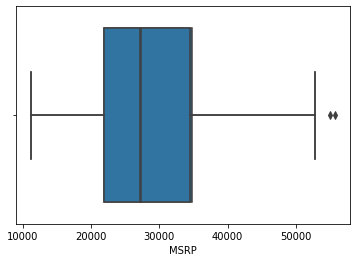

In [67]:
# Detecting Outliers
sns.boxplot(x=df['MSRP'])

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.boxplot(x=df['MSRP'])
